In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil

In [2]:
#将所有福字数据复制并重命名
def rename_images(new_path, folder_path, new_name_prefix):
    # 获取文件夹中所有文件的列表
    files = os.listdir(folder_path)
    
    # 遍历文件夹中的每个文件
    for i, file_name in enumerate(files):
        # 构造新的文件名
        new_file_name = f"{new_name_prefix}_{i}.png"  # 这里假设图片格式为.png，可以根据实际情况修改
        
        # 构造完整的文件路径
        old_file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(new_path, new_file_name)
        
        #复制
        shutil.copy2(old_file_path,new_file_path)

In [3]:
#数据路径
folder_path1 = "./test"  
folder_path2 = "./final_data/notfufu" 
new_path1 = "./newFu"
new_path2 = "./final_data/NOTFU"

# 新的文件名前缀
new_name_prefix1 = "FU"  
new_name_prefix2 = "NOTFU"  

#复制and重命名
#rename_images(new_path1, folder_path1, new_name_prefix1)
#rename_images(new_path2, folder_path2, new_name_prefix2)

In [4]:
#二值化
def binaryImage(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #三通道转单通道
    # 应用阈值进行二值化
    threshold_value = 75  # 阈值
    max_value = 255  # 最大值
    ret, binary_img = cv2.threshold(gray_img, threshold_value, max_value, cv2.THRESH_BINARY)
    return binary_img

In [5]:
#零一化
def zeroOne(img):
    binaryImg = binaryImage(img)
    if np.sum(binaryImg[0]) >= 255 * (img.shape[1]//2):
        arr = binaryImg == 0
    else:
        arr = binaryImg == 255
    arr = arr.astype(int)
    return arr

In [6]:
#投票式均值滤波
def meanFilter(img):
    image = img.copy()
    for i in range(1,img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            image[i,j] = sum(sum(image[i-1:i+2,j-1:j+2])) >=5
    return image

In [7]:
#计算范围
def makeRange(img):
    colSum = np.sum(img,axis = 0)
    rowSum = np.sum(img,axis = 1)
    result = [[0,0],[0,0]]
    for i in range(len(colSum)):
        if colSum[i] > 2 and i > 15:
            result[0][0] = i
            break
    for i in range(len(rowSum)):
        if rowSum[i] > 2 and i > 15:
            result[1][0] = i
            break
    for i in range(len(colSum) - 1,-1,-1):
        if colSum[i] > 2 and len(colSum) - 1 - i > 15:
            result[0][1] = i
            break
    for i in range(len(rowSum) - 1,-1,-1):
        if rowSum[i] > 2 and len(rowSum) - 1 - i > 15:
            result[1][1] = i
            break
    return result

In [8]:
#图片裁剪
def cutimg(img):
    Range = makeRange(img)
    newImg = img[Range[1][0]:Range[1][1] + 1,Range[0][0]:Range[0][1]+1]
    return newImg

In [9]:
#制作新图片
def makeNewImage(old_path,new_path,name):
    files = os.listdir(old_path)
    for i in range(len(files)):
        #设置路径
        file_name = f"{name}_{i}.png"
        new_name = f"{name}_{i}.png"
        path = os.path.join(old_path, file_name)
        newpath = os.path.join(new_path,new_name)
        
        #处理图像矩阵
        img = cv2.imread(path)
        if img is None:
            continue
        arr = zeroOne(img)
        arr = meanFilter(arr)
        arr = cutimg(arr)
        
        #再恢复为图片
        newImg = arr == 0
        newImg = newImg * 255
        newImg = newImg.astype(np.uint8)
        
        
        # 调整图片大小为 500x500
        resized_image = cv2.resize(newImg, (500, 500),interpolation=cv2.INTER_NEAREST)

        #写图片
        cv2.imwrite(newpath, resized_image)

In [10]:
#只进行二值化和大小转化
def makeNewImageJustBinary(old_path,new_path,name):
    files = os.listdir(old_path)
    for i, file_name in enumerate(files):
        new_name = f"{name}_{i}.png"
        path = os.path.join(old_path, file_name)
        newpath = os.path.join(new_path,new_name)
        
        img = cv2.imread(path)
        if img is None:
            continue
        arr = zeroOne(img)
        
        newImg = arr == 0
        newImg = newImg * 255
        newImg = newImg.astype(np.uint8)
        
        
        # 调整图片大小为 500x500
        resized_image = cv2.resize(newImg, (500, 500),interpolation=cv2.INTER_NEAREST)

        cv2.imwrite(newpath, resized_image)

In [11]:
#从一个数据集中按一定方法挑选数据
def copybmp(new_path):
    folder_path = "./手写汉字数据集"
    files = os.listdir(folder_path)
    for i, file_name in enumerate(files):
        if file_name == ".DS_Store":
            continue
        path = os.path.join(folder_path,file_name)
        file = os.listdir(path)
        index = (i ** 5 * 20 - 1) % len(file)
        path1 = os.path.join(path,file[index])
        path2 = os.path.join(new_path,file[index])
        shutil.copy2(path1,path2)

In [12]:
#实际运行操作
#copybmp("./new")
#makeNewImage('./data/FU',"./final_data/FU","FU")
#makeNewImage('./data/NOTFU',"./final_data/NOTFU","NOTFU")
#makeNewImagenew("./new","./newf","New")

In [13]:
img = cv2.imread("./final_data/fufu/FU_0.png")

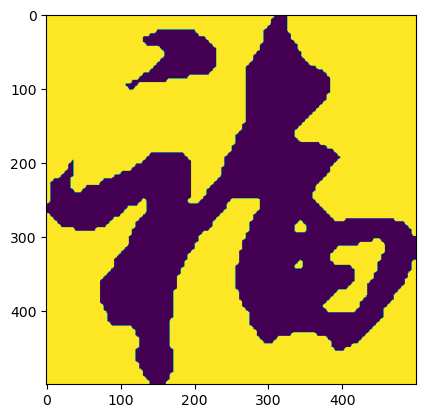

In [14]:
plt.imshow(binaryImage(img))